In [1]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.optimize import minimize
import re

# Data

In [2]:
data = pd.read_csv('data - Sheet1.csv')
data

,Bid,Price,Competitor Price,Bid Size,Won/Loss
0,1,8.22,8.37,267,1
1,2,10.01,9.32,480,0
2,3,8.47,8.63,217,0
3,4,8.77,8.99,302,1
4,5,9.10,9.02,301,1
5,6,9.03,10.01,240,1
6,7,9.55,8.77,237,1
7,8,8.99,9.37,225,0
8,9,9.31,8.59,243,0
9,10,9.22,8.99,311,0


# Baby Example

In [3]:
data['ratio'] = data['Price']/data['Competitor Price']

In [4]:
data

,Bid,Price,Competitor Price,Bid Size,Won/Loss,ratio
0,1,8.22,8.37,267,1,0.982079
1,2,10.01,9.32,480,0,1.074034
2,3,8.47,8.63,217,0,0.981460
3,4,8.77,8.99,302,1,0.975528
4,5,9.10,9.02,301,1,1.008869
5,6,9.03,10.01,240,1,0.902098
6,7,9.55,8.77,237,1,1.088940
7,8,8.99,9.37,225,0,0.959445
8,9,9.31,8.59,243,0,1.083818
9,10,9.22,8.99,311,0,1.025584


In [5]:
def f(x):
    
    win_probability = 1/(1+data['ratio']**x)
    se = (data['Won/Loss']-win_probability)**2
    sse = se.sum()
    return sse

def objective(x):
    # minus sign means the opposite of minimize
    return f(x)

x0 = 1

sol = minimize(objective,x0,options={'disp':True})

xOpt = sol.x
print(xOpt)

print(-sol.fun)

print(f(xOpt))

print(sol)

    

Optimization terminated successfully.
         Current function value: 2.287493
         Iterations: 5
         Function evaluations: 18
         Gradient evaluations: 9
[10.65686925]
-2.287492864710103
2.287492864710103
      fun: 2.287492864710103
 hess_inv: array([[336.56257642]])
      jac: array([-1.78813934e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 5
     njev: 9
   status: 0
  success: True
        x: array([10.65686925])


In [6]:
print(xOpt)

[10.65686925]


# Junior Example

In [7]:
data

,Bid,Price,Competitor Price,Bid Size,Won/Loss,ratio
0,1,8.22,8.37,267,1,0.982079
1,2,10.01,9.32,480,0,1.074034
2,3,8.47,8.63,217,0,0.981460
3,4,8.77,8.99,302,1,0.975528
4,5,9.10,9.02,301,1,1.008869
5,6,9.03,10.01,240,1,0.902098
6,7,9.55,8.77,237,1,1.088940
7,8,8.99,9.37,225,0,0.959445
8,9,9.31,8.59,243,0,1.083818
9,10,9.22,8.99,311,0,1.025584


In [8]:
def f(x):
    
    win_probability = 1/(1+np.exp(x[0]+data['Price']*x[1]))
    likelihood = (data['Won/Loss']*win_probability)+(1-data['Won/Loss'])*(1-win_probability)
    ln_likelihood = np.log(likelihood)
    sse = ln_likelihood.sum()
    return sse
    
def objective(x):
    # minus sign means the opposite of minimize
    return -f(x)

x0 = np.array([1,1])
sol = minimize(objective,x0,options={'disp':True})

xOpt = sol.x
print(xOpt)

print(-sol.fun)

print(f(xOpt))

print(sol)

    

Optimization terminated successfully.
         Current function value: 6.545935
         Iterations: 16
         Function evaluations: 54
         Gradient evaluations: 18
[-10.89954637   1.20226813]
-6.545934540330984
-6.545934540330984
      fun: 6.545934540330984
 hess_inv: array([[168.22359314, -18.51742308],
       [-18.51742308,   2.04357128]])
      jac: array([5.96046448e-08, 2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 54
      nit: 16
     njev: 18
   status: 0
  success: True
        x: array([-10.89954637,   1.20226813])


# Junior Example 2

In [9]:
def f(x):
    
    win_probability = 1/(1+np.exp(x[0]+data['Price']*x[1]+data['Competitor Price']*x[2]))
    likelihood = (data['Won/Loss']*win_probability)+(1-data['Won/Loss'])*(1-win_probability)
    ln_likelihood = np.log(likelihood)
    sse = ln_likelihood.sum()
    return sse
    
def objective(x):
    # minus sign means the opposite of minimize
    return -f(x)

x0 = np.array([1,1,1])
sol = minimize(objective,x0,options={'disp':True})

xOpt = sol.x
print(xOpt)

print(-sol.fun)

print(f(xOpt))

print(sol)

    

Optimization terminated successfully.
         Current function value: 6.404998
         Iterations: 19
         Function evaluations: 96
         Gradient evaluations: 24
[-5.7320382   1.46916186 -0.84165018]
-6.404998364798566
-6.404998364798566
      fun: 6.404998364798566
 hess_inv: array([[255.69154347, -12.67142899, -15.61972421],
       [-12.67142899,   2.27355254,  -0.8758541 ],
       [-15.61972421,  -0.8758541 ,   2.61379396]])
      jac: array([-2.38418579e-07, -1.84774399e-06, -1.78813934e-06])
  message: 'Optimization terminated successfully.'
     nfev: 96
      nit: 19
     njev: 24
   status: 0
  success: True
        x: array([-5.7320382 ,  1.46916186, -0.84165018])


/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cst/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


# Junior Example 3

In [10]:
def f(x):
    
    win_probability = 1/(1+np.exp(x[0]+data['Price']*x[1]+data['Competitor Price']*x[2]+data['Bid Size']*x[3]))
    likelihood = (data['Won/Loss']*win_probability)+(1-data['Won/Loss'])*(1-win_probability)
    ln_likelihood = np.log(likelihood)
    sse = ln_likelihood.sum()
    return sse
    
def objective(x):
    # minus sign means the opposite of minimize
    return -f(x)

x0 = np.array([1,1,1,1])
sol = minimize(objective,x0,options={'disp':True})

xOpt = sol.x
print(xOpt)

print(-sol.fun)

print(f(xOpt))

print(sol)

    

/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cst/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


         Current function value: 6.403630
         Iterations: 25
         Function evaluations: 279
         Gradient evaluations: 55
[-5.47292375e+00  1.41730535e+00 -8.37586244e-01  6.20341892e-04]
-6.403630015376784
-6.403630015376784
      fun: 6.403630015376784
 hess_inv: array([[ 2.96110231e+02, -1.72440329e+01, -1.72961685e+01,
         5.21370390e-02],
       [-1.72440329e+01,  1.03135296e+00,  1.03611745e+00,
        -4.76473192e-03],
       [-1.72961685e+01,  1.03611745e+00,  1.04100721e+00,
        -4.88969797e-03],
       [ 5.21370390e-02, -4.76473192e-03, -4.88969797e-03,
         1.24966746e-04]])
      jac: array([-1.78813934e-07, -2.02655792e-06, -1.72853470e-06, -6.19888306e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 279
      nit: 25
     njev: 55
   status: 2
  success: False
        x: array([-5.47292375e+00,  1.41730535e+00, -8.37586244e-01,  6.20341892e-04])


# Price Model

In [26]:
MSRP = 25000
Unit_Cost = 15000

In [27]:
fleet_sales = pd.read_csv('fleet_sales.csv')

In [28]:
for col in fleet_sales.columns:
    
    fleet_sales[col] = fleet_sales[col].apply(lambda x: ''.join([n for n in str(x) if n.isdigit()]) )
    fleet_sales[col] = fleet_sales[col].astype(float)

In [29]:
fleet_sales['Discount_Pctg'] = (MSRP-fleet_sales['Unit Price'])/MSRP
fleet_sales['Unit_Margin'] = fleet_sales['Unit Price']-Unit_Cost
fleet_sales['Units_Sold'] = fleet_sales['Win']*fleet_sales['Units']
fleet_sales['Total_Margin'] = fleet_sales['Units_Sold']*fleet_sales['Unit_Margin']

In [30]:
fleet_sales['Price_Ratio'] = fleet_sales['Unit Price']/MSRP

In [31]:
def f(x):
    
    win_probability = 1/(1+np.exp(x[0]+fleet_sales['Price_Ratio']*x[1]))    
    likelihood = (fleet_sales['Win']*win_probability)+(1-fleet_sales['Win'])*(1-win_probability)
    ln_likelihood = np.log(likelihood)
    sse = ln_likelihood.sum()
    return sse
  

    
def objective(x):
    # minus sign means the opposite of minimize
    return -f(x)

x0 = np.array([1,1])
f(x0)

sol = minimize(objective,x0,options={'disp':True})

xOpt = sol.x
print(xOpt)

print(-sol.fun)

print(f(xOpt))

print(sol)

Optimization terminated successfully.
         Current function value: 2261.869726
         Iterations: 8
         Function evaluations: 39
         Gradient evaluations: 13
[-7.75627241  9.16420237]
-2261.869726420981
-2261.869726420981
      fun: 2261.869726420981
 hess_inv: array([[ 0.1228791 , -0.15694856],
       [-0.15694856,  0.20262289]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 39
      nit: 8
     njev: 13
   status: 0
  success: True
        x: array([-7.75627241,  9.16420237])


## Recalculate Everything

In [32]:
fleet_sales['win_probability'] = 1/(1+np.exp(xOpt[0]+fleet_sales['Price_Ratio']*xOpt[1]))    
fleet_sales['likelihood'] = (fleet_sales['Win']*fleet_sales['win_probability'])+(1-fleet_sales['Win'])*(1-fleet_sales['win_probability'])
fleet_sales['ln_likelihood'] = np.log(fleet_sales['likelihood'])

In [33]:
fleet_sales

,Bid No.,Units,Unit Price,Total Price,Win,Discount_Pctg,Unit_Margin,Units_Sold,Total_Margin,Price_Ratio,win_probability,likelihood,ln_likelihood
0,1.0,12.0,16551.0,198612.0,1.0,0.33796,1551.0,12.0,18612.0,0.66204,0.844119,0.844119,-0.169461
1,2.0,24.0,16272.0,390523.0,0.0,0.34912,1272.0,0.0,0.0,0.65088,0.857108,0.142892,-1.945667
2,3.0,16.0,21266.0,340261.0,1.0,0.14936,6266.0,16.0,100256.0,0.85064,0.490210,0.490210,-0.712921
3,4.0,21.0,18805.0,394910.0,0.0,0.24780,3805.0,0.0,0.0,0.75220,0.703279,0.296721,-1.214962
4,5.0,27.0,15884.0,428864.0,0.0,0.36464,884.0,0.0,0.0,0.63536,0.873659,0.126341,-2.068770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996.0,10.0,15316.0,153162.0,1.0,0.38736,316.0,10.0,3160.0,0.61264,0.894911,0.894911,-0.111031
3996,3997.0,17.0,21131.0,359232.0,1.0,0.15476,6131.0,17.0,104227.0,0.84524,0.502580,0.502580,-0.687999
3997,3998.0,25.0,18005.0,450125.0,1.0,0.27980,3005.0,25.0,75125.0,0.72020,0.760644,0.760644,-0.273590
3998,3999.0,14.0,20395.0,285533.0,1.0,0.18420,5395.0,14.0,75530.0,0.81580,0.569575,0.569575,-0.562865


In [34]:
xs = np.arange(0.5,1.1,0.01)
probs = [1/(1+np.exp(xOpt[0]+(xOpt[1]*x))) for x in xs]
margin_per_unit = [ ((x*MSRP)-Unit_Cost)*prob for x, prob in zip(xs,probs)]

df = pd.DataFrame([xs,probs,margin_per_unit]).T
df.columns = ['price_ratio','prob','unit_margin']
df

,price_ratio,prob,unit_margin
0,0.50,0.959851,-2399.626604
1,0.51,0.956166,-2151.374201
2,0.52,0.952161,-1904.321476
3,0.53,0.947809,-1658.665942
4,0.54,0.943085,-1414.627954
...,...,...,...
56,1.06,0.123707,1422.633666
57,1.07,0.114111,1340.799349
58,1.08,0.105169,1262.028161
59,1.09,0.096851,1186.430810


In [35]:
optimial_price_ratio = df.loc[df['unit_margin']==df['unit_margin'].max()]['price_ratio'].values[0]
actual_price = optimial_price_ratio*MSRP
probability = 1/(1+np.exp(xOpt[0]+(xOpt[1]*optimial_price_ratio)))
margin = (actual_price-Unit_Cost)*probability

print('optimial_price_ratio:',optimial_price_ratio)
print('actual_price:',actual_price)
print('probability:',probability)
print('margin:',margin)


optimial_price_ratio: 0.8300000000000003
actual_price: 20750.000000000007
probability: 0.5374259776756151
margin: 3090.1993716347906


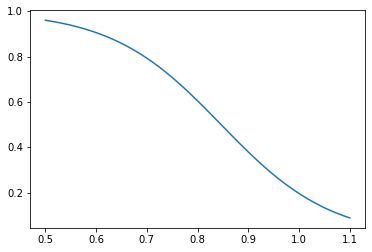

In [36]:
plt.plot(xs,probs)

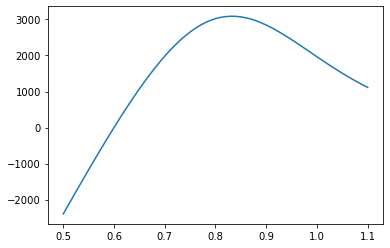

In [37]:
plt.plot(xs,margin_per_unit)

# Segmented Model

In [38]:
segmented_model = pd.read_csv('segmented_model.csv')

In [41]:
for col in segmented_model.columns:
    
    segmented_model[col] = segmented_model[col].apply(lambda x: ''.join([n for n in str(x) if n.isdigit()]) )
    segmented_model[col] = segmented_model[col].astype(float)

In [44]:
segmented_model['Discount_Pctg'] = (MSRP-segmented_model['Unit Price'])/MSRP
segmented_model['Unit_Margin'] = segmented_model['Unit Price']-Unit_Cost
segmented_model['Units_Sold'] = segmented_model['Win']*segmented_model['Units']
segmented_model['Total_Margin'] = segmented_model['Units_Sold']*segmented_model['Unit_Margin']
segmented_model['Price_Ratio'] = segmented_model['Unit Price']/MSRP

In [45]:
segmented_model

,Bid No.,Government,Units,Unit Price,Total Price,Win,Discount_Pctg,Unit_Margin,Units_Sold,Total_Margin,Price_Ratio
0,1.0,1.0,12.0,16551.0,198612.0,1.0,0.33796,1551.0,12.0,18612.0,0.66204
1,2.0,1.0,24.0,16272.0,390523.0,0.0,0.34912,1272.0,0.0,0.0,0.65088
2,3.0,1.0,16.0,21266.0,340261.0,1.0,0.14936,6266.0,16.0,100256.0,0.85064
3,4.0,1.0,21.0,18805.0,394910.0,0.0,0.24780,3805.0,0.0,0.0,0.75220
4,5.0,1.0,27.0,15884.0,428864.0,0.0,0.36464,884.0,0.0,0.0,0.63536
...,...,...,...,...,...,...,...,...,...,...,...
3995,3996.0,0.0,10.0,15316.0,153162.0,1.0,0.38736,316.0,10.0,3160.0,0.61264
3996,3997.0,0.0,17.0,21131.0,359232.0,1.0,0.15476,6131.0,17.0,104227.0,0.84524
3997,3998.0,0.0,25.0,18005.0,450125.0,1.0,0.27980,3005.0,25.0,75125.0,0.72020
3998,3999.0,0.0,14.0,20395.0,285533.0,1.0,0.18420,5395.0,14.0,75530.0,0.81580


In [47]:
def f(x):
    
    win_probability = 1/(1+np.exp(x[0]+segmented_model['Price_Ratio']*x[1]))    
    likelihood = (segmented_model['Win']*win_probability)+(1-segmented_model['Win'])*(1-win_probability)
    ln_likelihood = np.where(segmented_model['Government']==1,np.log(likelihood),0)
    sse = ln_likelihood.sum()
    return sse
  

    
def objective(x):
    # minus sign means the opposite of minimize
    return -f(x)

x0 = np.array([1,1])
f(x0)

sol = minimize(objective,x0,options={'disp':True})

xOpt = sol.x
print(xOpt)

print(-sol.fun)

print(f(xOpt))

print(sol)

Optimization terminated successfully.
         Current function value: 905.602869
         Iterations: 10
         Function evaluations: 33
         Gradient evaluations: 11
[-14.21872527  20.00170174]
-905.6028685876418
-905.6028685876418
      fun: 905.6028685876418
 hess_inv: array([[ 0.38696533, -0.53043213],
       [-0.53043213,  0.73341882]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 33
      nit: 10
     njev: 11
   status: 0
  success: True
        x: array([-14.21872527,  20.00170174])


In [48]:
def f(x):
    
    win_probability = 1/(1+np.exp(x[0]+segmented_model['Price_Ratio']*x[1]))    
    likelihood = (segmented_model['Win']*win_probability)+(1-segmented_model['Win'])*(1-win_probability)
    ln_likelihood = np.where(segmented_model['Government']!=1,np.log(likelihood),0)
    sse = ln_likelihood.sum()
    return sse
  

    
def objective(x):
    # minus sign means the opposite of minimize
    return -f(x)

x0 = np.array([1,1])
f(x0)

sol = minimize(objective,x0,options={'disp':True})

xOpt = sol.x
print(xOpt)

print(-sol.fun)

print(f(xOpt))

print(sol)

Optimization terminated successfully.
         Current function value: 129.838189
         Iterations: 17
         Function evaluations: 60
         Gradient evaluations: 20
[-25.97033298  26.64005316]
-129.83818878296134
-129.83818878296134
      fun: 129.83818878296134
 hess_inv: array([[ 2.92933621, -3.3813401 ],
       [-3.3813401 ,  3.94830705]])
      jac: array([-7.62939453e-06, -7.62939453e-06])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 17
     njev: 20
   status: 0
  success: True
        x: array([-25.97033298,  26.64005316])


# Size Model

In [100]:
size_model = pd.read_csv('size_model.csv')

In [101]:
for col in size_model.columns:
    
    size_model[col] = size_model[col].apply(lambda x: ''.join([n for n in str(x) if n.isdigit()]) )
    size_model[col] = size_model[col].astype(float)

In [102]:
size_model['Discount_Pctg'] = (MSRP-size_model['Unit_Price'])/MSRP
size_model['Unit_Margin'] = size_model['Unit_Price']-Unit_Cost
size_model['Units_Sold'] = size_model['Win']*size_model['Units']
size_model['Total_Margin'] = size_model['Units_Sold']*size_model['Unit_Margin']
size_model['Price_Ratio'] = size_model['Unit_Price']/MSRP

In [103]:
size_model

,Bid_No,Government,Units,Unit_Price,Total_Price,Win,MSRP,Unit_Cost,Discount_Pctg,Unit_Margin,Units_Sold,Total_Margin,Price_Ratio
0,1.0,1.0,12.0,16551.0,198612.0,1.0,25000.0,15000.0,0.33796,1551.0,12.0,18612.0,0.66204
1,2.0,1.0,24.0,16272.0,390523.0,0.0,25000.0,15000.0,0.34912,1272.0,0.0,0.0,0.65088
2,3.0,1.0,16.0,21266.0,340261.0,1.0,25000.0,15000.0,0.14936,6266.0,16.0,100256.0,0.85064
3,4.0,1.0,21.0,18805.0,394910.0,0.0,25000.0,15000.0,0.24780,3805.0,0.0,0.0,0.75220
4,5.0,1.0,27.0,15884.0,428864.0,0.0,25000.0,15000.0,0.36464,884.0,0.0,0.0,0.63536
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996.0,0.0,10.0,15316.0,153162.0,1.0,25000.0,15000.0,0.38736,316.0,10.0,3160.0,0.61264
3996,3997.0,0.0,17.0,21131.0,359232.0,1.0,25000.0,15000.0,0.15476,6131.0,17.0,104227.0,0.84524
3997,3998.0,0.0,25.0,18005.0,450125.0,1.0,25000.0,15000.0,0.27980,3005.0,25.0,75125.0,0.72020
3998,3999.0,0.0,14.0,20395.0,285533.0,1.0,25000.0,15000.0,0.18420,5395.0,14.0,75530.0,0.81580


In [104]:
def f(x):
    
    win_probability = 1/(1+np.exp(x[0]+size_model['Price_Ratio']*x[1]+size_model['Units']*x[2]))    
    likelihood = (size_model['Win']*win_probability)+(1-size_model['Win'])*(1-win_probability)
    ln_likelihood = np.where(size_model['Government']==1,np.log(likelihood),0)
    sse = ln_likelihood.sum()
    return sse
  

    
def objective(x):
    # minus sign means the opposite of minimize
    return -f(x)

x0 = np.array([1,1,1])
# f(x0)

sol = minimize(objective,x0,options={'disp':True})

xOpt = sol.x
print(xOpt)

print(-sol.fun)

print(f(xOpt))

print(sol)

         Current function value: 895.394398
         Iterations: 17
         Function evaluations: 116
         Gradient evaluations: 29
[-15.07250833  20.27781163   0.03336915]
-895.3943980719724
-895.3943980719724
      fun: 895.3943980719724
 hess_inv: array([[ 1.96014073e-01, -1.96350338e-01, -2.42131379e-03],
       [-1.96350338e-01,  1.98085973e-01,  2.37614445e-03],
       [-2.42131379e-03,  2.37614445e-03,  3.79962948e-05]])
      jac: array([ 0.00000000e+00,  0.00000000e+00, -7.62939453e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 116
      nit: 17
     njev: 29
   status: 2
  success: False
        x: array([-15.07250833,  20.27781163,   0.03336915])


In [105]:
gov = xOpt

In [106]:
def f(x):
    
    win_probability = 1/(1+np.exp(x[0]+size_model['Price_Ratio']*x[1]+size_model['Units']*x[2]))    
    likelihood = (size_model['Win']*win_probability)+(1-size_model['Win'])*(1-win_probability)
    ln_likelihood = np.where(size_model['Government']!=1,np.log(likelihood),0.0000001)
    sse = ln_likelihood.sum()
    return sse
  

    
def objective(x):
    # minus sign means the opposite of minimize
    return -f(x)

x0 = np.array([1,1,1])
# f(x0)

sol = minimize(objective,x0,options={'disp':True})

xOpt = sol.x
print(xOpt)

print(-sol.fun)

print(f(xOpt))

print(sol)

/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cst/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/cst/anaconda3/lib/python3.8/site-packages/scipy/optimize/_numdiff.py:497: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/cst/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*

         Current function value: 129.833428
         Iterations: 25
         Function evaluations: 329
         Gradient evaluations: 78
[-2.59037439e+01  2.66124225e+01 -2.28937536e-03]
-129.83342759143216
-129.83342759143216
      fun: 129.83342759143216
 hess_inv: array([[ 4.74370102e+01, -5.40367507e+01, -5.32589700e-02],
       [-5.40367507e+01,  6.18530666e+01,  4.89409999e-02],
       [-5.32589700e-02,  4.89409999e-02,  5.88107189e-04]])
      jac: array([9.53674316e-06, 7.62939453e-06, 2.13623047e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 329
      nit: 25
     njev: 78
   status: 2
  success: False
        x: array([-2.59037439e+01,  2.66124225e+01, -2.28937536e-03])


In [107]:
corporate = xOpt

In [108]:
gov

array([-15.07250833,  20.27781163,   0.03336915])

In [109]:
corporate

array([-2.59037439e+01,  2.66124225e+01, -2.28937536e-03])

In [123]:
msrp_ = 25000
unit_cost_ = 15000
xs = np.arange(0.5,1.1,0.05)
print(xs)
probs = [(1/(1+np.exp(gov[0]+(gov[1]*x)+(gov[2]*5)))).round(2) for x in xs]
print(probs)
# =((T11*$E$2)-$E$3)*U11
margin_per_unit = [ ((x*msrp_)-unit_cost_)*prob for x, prob in zip(xs,probs)]
margin_per_unit

[0.5  0.55 0.6  0.65 0.7  0.75 0.8  0.85 0.9  0.95 1.   1.05 1.1 ]
[0.99, 0.98, 0.94, 0.85, 0.67, 0.42, 0.21, 0.09, 0.03, 0.01, 0.0, 0.0, 0.0]


[-2475.0,
 -1224.9999999999982,
 1.709850039333105e-12,
 1062.500000000003,
 1675.0000000000025,
 1575.000000000003,
 1050.0000000000016,
 562.5000000000007,
 225.0000000000002,
 87.50000000000011,
 0.0,
 0.0,
 0.0]

In [2]:
'a' not in ['a','b','c']

False